# Assignment 2: Linear Models and Validation Metrics (40 marks total)
### Due: February 16 at 11:59pm

### Name: Kelechi Mbibi

### In this assignment, you will need to write code that uses linear models to perform classification and regression tasks. You will also be asked to describe the process by which you came up with the code. More details can be found below. Please cite any websites or AI tools that you used to help you with this assignment.

## Part 1: Classification (20 marks)

You have been asked to develop code that can help the user determine if the email they have received is spam or not. Following the machine learning workflow described in class, write the relevant code in each of the steps below:

### Step 0: Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings('ignore')

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/spam.html

Use the yellowbrick function `load_spam()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [ ]:
# TO DO: Import spam dataset from yellowbrick library (0.5 marks)
from yellowbrick.datasets import load_spam

# TO DO: Print size and type of X and y (0.5 marks)
X, y = load_spam()

In [ ]:
# type and size of X
print(type(X))
print(X.size)

<class 'pandas.core.frame.DataFrame'>
262200


In [ ]:
# type and size of y
print(type(y))
print(y.size)

<class 'pandas.core.series.Series'>
4600


### Step 2: Data Processing (2 marks)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [ ]:
# checking for missing values in X
np.isnan(X)
missing_values_X = np.isnan(X).sum()
missing_values_X

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [ ]:
# checking for missing values in y
np.isnan(y)
missing_values_y = np.isnan(y).sum()
missing_values_y

0

For this task, we want to test if the linear model would still work if we used less data. Use the `train_test_split` function from sklearn to create a new feature matrix named `X_small` and a new target vector named `y_small` that contain **3%** of the data.

In [ ]:
# TO DO: Create X_small and y_small (1 mark)
from sklearn.model_selection import train_test_split

X_small, _, y_small, _, = train_test_split(X, y, train_size=0.03, random_state=0, stratify=y)


### Step 3: Implement Machine Learning Model

1. Import `LogisticRegression` from sklearn
2. Instantiate model `LogisticRegression(max_iter=2000)`
3. Implement the machine learning model with three different datasets:
    - `X` and `y`
    - Only first two columns of `X` and `y`
    - `X_small` and `y_small`

### Step 4: Validate Model

Calculate the training and validation accuracy for the three different tests implemented in Step 3

### Step 5.1: Visualize Results (4 marks)

1. Create a pandas DataFrame `results` with columns: Data size, training accuracy, validation accuracy
2. Add the data size, training and validation accuracy for each dataset to the `results` DataFrame
3. Print `results`

In [ ]:
# TO DO: ADD YOUR CODE HERE FOR STEPS 3-5
# Note: for any random state parameters, you can use random_state = 0
# HINT: USING A LOOP TO STORE THE DATA IN YOUR RESULTS DATAFRAME WILL BE MORE EFFICIENT
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# initiating the linear model; LogisticRegression
model = LogisticRegression(max_iter=2000)

In [ ]:
# splitting the full dataset for training and validation.
X1, X2, y1, y2 = train_test_split(X,y, random_state=0, stratify=y)
model.fit(X1,y1)

y1_pred = model.predict(X1)
training1_score = accuracy_score(y1_pred, y1)

y2_pred = model.predict(X2)
validation1_score = accuracy_score(y2_pred, y2)

print("Model for the entire dataset:")
print("Training score: {:.3f}".format(training1_score))
print("Validation score: {:.3f}".format(validation1_score))


Model for the entire dataset:
Training score: 0.933
Validation score: 0.930


In [ ]:
# slicing the first two columns of the dataset
X_columns = pd.DataFrame(X)
X_2_cols = X_columns.iloc[:, :2]

# splitting the first two columns for training and validation.
X_col, X_val, y_col, y_val = train_test_split(X_2_cols, y, random_state=0, stratify=y)
model.fit(X_col, y_col)

y_col_pred = model.predict(X_col)
training2_score = accuracy_score(y_col_pred, y_col)

y_val_pred = model.predict(X_val)
validation2_score = accuracy_score(y_val_pred, y_val)

print("Model for the first two columns dataset:")
print("Training score: {:.3f}".format(training2_score))
print("Validation score: {:.3f}".format(validation2_score))




Model for the first two columns dataset:
Training score: 0.619
Validation score: 0.605


In [ ]:
# using the created new feature matrix(X_small) and target vector(y_small) that contains 3% of the original dataset
X_small_t, X_small_v, y_small_t, y_small_v = train_test_split(X_small, y_small, random_state=0,)
model.fit(X_small_t, y_small_t)

y_small_t_pred = model.predict(X_small_t)
training3_score = accuracy_score(y_small_t_pred, y_small_t)

y_small_v_pred = model.predict(X_small_v)
validation3_score = accuracy_score(y_small_v_pred, y_small_v)

print("Model for the 3% dataset:")
print("Training score: {:.3f}".format(training3_score))
print("Validation score: {:.3f}".format(validation3_score))



Model for the 3% dataset:
Training score: 0.961
Validation score: 0.857


In [ ]:
results = pd.DataFrame(columns=["Data description", "Data size", "Training accuracy", "Validation accuracy"])


data = [
    ("3% dataset", X_small.size, training3_score, validation3_score),
    ("Entire dataset", X.size, training1_score, validation1_score),
    ("First two columns", X_2_cols.size, training2_score, validation2_score)
]


for separation, size, train_acc, val_acc in data:
    results = results.append({"Data description":separation, "Data size": size, "Training accuracy": train_acc, "Validation accuracy": val_acc}, ignore_index=True)


results

,Data description,Data size,Training accuracy,Validation accuracy
0,3% dataset,7866,0.961165,0.857143
1,Entire dataset,262200,0.933043,0.930435
2,First two columns,9200,0.619420,0.605217


### Step 5.2: Visualize Classification Errors (3 marks)

In this section, print the confusion matrix and the classification report to investigate the number of false positives vs. false negatives. Use the full dataset for this analysis

In [ ]:
# TO DO: Retrieve target vector and predicted values for validation set using full dataset

# from implementing the model on the full dataset, we obtain our target vector(y_true) and predicted values(y_pred)
y_true = y2
y_pred = y2_pred

print(y_true.shape)
print(y_pred.shape)


(1150,)
(1150,)


In [ ]:
# TO DO: Print confusion matrix using a heatmap
# HINT: To remove scientific notation from a heatmap, set the parameter fmt='d'
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_true,y_pred )
my_labels = ['Not Spam', 'Spam']
print(Conf_Mat)

[[658  39]
 [ 41 412]]


Text(0.5, 1.0, 'Confusion Matrix')

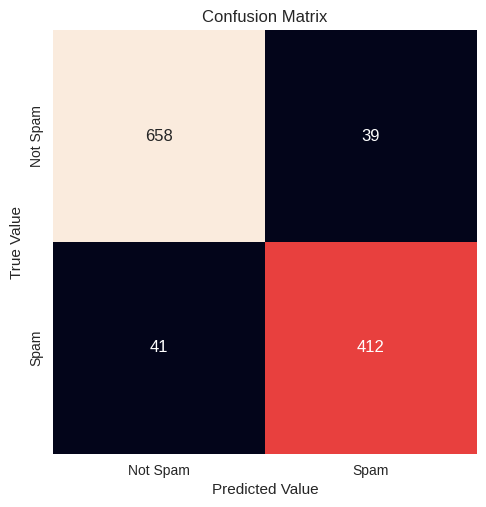

In [ ]:
sns.heatmap(Conf_Mat, square=True, annot=True, cbar=False, fmt='d', xticklabels=my_labels, yticklabels=my_labels)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix')

In [ ]:
# TO DO: Print classification report
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred,
                            target_names=["not spam", "spam"],
                           zero_division=0))

              precision    recall  f1-score   support

    not spam       0.94      0.94      0.94       697
        spam       0.91      0.91      0.91       453

    accuracy                           0.93      1150
   macro avg       0.93      0.93      0.93      1150
weighted avg       0.93      0.93      0.93      1150



### Questions (6 marks)
1. How do the training and validation accuracy change depending on the amount of data used? Explain with values.
1. In this case, what do a false positive and a false negative represent? Which one is worse?
1. Based on your answer to question 2, would you want to maximize precision or recall? How would you do this?

*ANSWER HERE*

1. The "3% dataset" has a high training score of '96.1%' showing that the model performed well with a smaller subset of the entire data during the training of the model, however the validation score of '85.7%' shows that the model was overfitting the data and might not perfom well on new unseen data.

   The "Entire dataset" shows that the model has a training score of '93.3%'. it also has a high model validation score of '93.0%' indicating that the model performed well with the data it was trained on, and will likely perform well on new unseen data.

   The "First 2 cols dataset" has low training and validation scores of '61.9%' and '60.5%' respectively indicating that the model struggles when being trained on just a fraction of features from the full dataset likely missing important features needed for accurate predictions leading to poor performances on the training and validation sets.  

2. A false positive prediction represents the amount of time the predicted value was 'spam' and the actual value was 'not spam', while a false negative prediction represent the amount of time the predicted value was 'not spam' and the true value was 'spam'. i personally think having more false positive predictions in this case is worse, example being, as a student here at the UofC i get a lot of emails concerning school work, a false positive prediction might mean classifying important email correspondeces as 'spam' when it's true value is 'not spam'.

3. I would want to maximize precision and i would achieve that by shifting the decision function boundary towards 1, hence reducing the amount of false positive predictions achieved.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

I sourced my code from your lecture slides and examples on linear models namely; Linear Classification.ipynb, Binary Classification.ipynb and ML Workflow ex.ipynb. Also, i was able to get valuable insight from stack overflow.

The order in which i completed the steps are; i first imported the dataset from the library, then i processed it by checking for null values of which i found none. i imported my linear model and the train test split. i split the datasets as instructed and implemented the model on the different splits, then i validated my model and its predictions. after which, i went on to visualize my findings and then plot a confusion matrix.

I used generative AI to give me various contexts that might be applicable to spam emails.

I had challenges in achieving the instructed splits but i was able to overcome it by asking my professor some questions pertaining the splitting instructions and collaborating with my peers.

## Part 2: Regression (15 marks)

For this section, we will be evaluating concrete compressive strength of different concrete samples, based on age and ingredients. You will need to repeat the steps from Part 1 for this analysis.

### Step 1: Data Input (1 mark)

The data used for this task can be downloaded using the yellowbrick library:
https://www.scikit-yb.org/en/latest/api/datasets/concrete.html

Use the yellowbrick function `load_concrete()` to load the spam dataset into the feature matrix `X` and target vector `y`.

Print the size and type of `X` and `y`.

In [ ]:
# TO DO: Import concrete dataset from yellowbrick library (0.5 marks)
from yellowbrick.datasets import load_concrete

# TO DO: Print size and type of X and y (0.5 marks)
X,y = load_concrete()

In [ ]:
# type and size of X
print(type(X))
print(X.size)

<class 'pandas.core.frame.DataFrame'>
8240


In [ ]:
# type and size of y
print(type(y))
print(y.size)

<class 'pandas.core.series.Series'>
1030


### Step 2: Data Processing (1 mark)

Check to see if there are any missing values in the dataset. If necessary, select an appropriate method to fill-in the missing values.

In [ ]:
# checking for missing values in X
np.isnan(X)
missing_values_X = np.isnan(X).sum()
missing_values_X

cement    0
slag      0
ash       0
water     0
splast    0
coarse    0
fine      0
age       0
dtype: int64

In [ ]:
# checking for missing values in X
np.isnan(y)
missing_values_y = np.isnan(y).sum()
missing_values_y

0

### Step 3: Implement Machine Learning Model (2 marks)

1. Import `LinearRegression` from sklearn
2. Instantiate model `LinearRegression()`
3. Implement the machine learning model with `X` and `y`

In [ ]:
# TO DO: ADD YOUR CODE HERE
# Note: for any random state parameters, you can use random_state = 0
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X,y, random_state=0,)

model = LinearRegression()

model.fit(X_train,y_train)

y_val_pred = model.predict(X_val)
y_train_pred = model.predict(X_train)


### Step 4: Validate Model (2 marks)

Calculate the training and validation accuracy using mean squared error and R2 score.

In [ ]:
# TO DO: ADD YOUR CODE HERE
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

train_mse = mean_squared_error(y_train, y_train_pred)
val_mse = mean_squared_error(y_val, y_val_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("Training and validation for the dataset using MSE:")
print("Training MSE: {:.2f}".format(train_mse))
print("Validation MSE: {:.2f}".format(val_mse))

print("\nTraining and validation for the dataset using r2 score:")
print("Training R2 Score: {:.2f}".format(train_r2))
print("Validation R2 Score: {:.2f}".format(val_r2))

Training and validation for the dataset using MSE:
Training MSE: 111.36
Validation MSE: 95.90

Training and validation for the dataset using r2 score:
Training R2 Score: 0.61
Validation R2 Score: 0.62


### Step 5: Visualize Results (1 mark)

1. Create a pandas DataFrame `results` with columns: Training accuracy and Validation accuracy, and index: MSE and R2 score
2. Add the accuracy results to the `results` DataFrame
3. Print `results`

In [ ]:
# TO DO: ADD YOUR CODE HERE
accuracy_results =  {'Training Accuracy': [111.36, 0.61],
                     'Validation Accuracy':[95.90,0.62]
                     }

index=['MSE' , 'R2 Score']

results= pd.DataFrame(accuracy_results, index=index)

results




,Training Accuracy,Validation Accuracy
MSE,111.36,95.90
R2 Score,0.61,0.62


### Questions (4 marks)
1. Did using a linear model produce good results for this dataset? Why or why not?
2. Could we tell if this model was a good fit by using just the mean squared error? Why or why not?

*ANSWER HERE*
1. using a linear model did not produce good results for the dataset because the features contained in the dataset might have a more non linear relationship meaning we have to explore more complex models.

2. we could tell if this model was a good fit by just using mean squared validation because the interpretation of mse score depends on the scale of the target variable in your dataset, in the sense that if the range of values contained in your target vector is from 0-100, an mse score of of 100 would indicate that the model was a very poor fit on the data. so in our case, compared to the range of values contained in the target vector, we got a high mse score which indicates that the model performed poorly on our data.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE - BE SPECIFIC*

I sourced my code from lecture slides and examples namely; Linear Regression.ipynb and Regression Metrics.ipynb

The order in which i completed the steps are; imported the dataset from the specified library as instructed, checked for null values contained in the data set, imported the Linear Regression model, split the daraset into training and validation sets, calculated my training and validation scores using the R2 score and Mean Squared Error function, Visualised my findings.

I used generative AI to explain the correlation between the MSE and the target vector variables.

I had challenges understanding why i had a high MSE value in my training and validation sets, i was able to overcome them by asking my professor to explain some key concepts surrounding MSE and by seeking insights from generative AI.

## Part 3: Observations/Interpretation (3 marks)

Describe any pattern you see in the results. Relate your findings to what we discussed during lectures. Include data to justify your findings.


*ADD YOUR FINDINGS HERE*

The patterns i recognized during this exercise was recognizing how the Logistic regression model responded to the different sizes of the datasets.

for the whole data set, the model generalized well to the training set and also performed well on the validation set, this was shown with its training score of '0.933' and validation score of '0.930' indicating that it will perform well on new unseen data.

for the '3% dataset' the model performed well on the training set with a training score of '0.961' but had a significantly lower value of '0.857' for the validation set which indicates high variance and the model overfitting the data.

for the "first 2 columns dataset" the model performed poorly on both training and validation sets with training score of '0.619' and validation score of '0.605' indicating a high bias and highlighting the fact that the model underfits the data set.

finally, i observed that using the "stratify" parameter while implementing the Logistic Regression model on the different sizes of our dataset ensured a balanced distribution of features in my training and validation sets.



## Part 4: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challenging, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

what i liked and found interesting was getting results after my running my code and being able to remeber the point in time when the code syntax i ran was discussed in class.

what i found really challenging was trying to achieve the desired splits and also, trying to establish the correlation between MSE and the target variables of my dataset.